<a href="https://colab.research.google.com/github/msaad1311/Machine-Translation-English-to-French/blob/master/Machine_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import collections
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import LSTM, GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional,Flatten
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
with open('/content/small_vocab_en', "r") as f:
        data = f.read()

english_sentences = data.split('\n')

with open('/content/small_vocab_fr', "r") as f:
        data = f.read()

french_sentences = data.split('\n')

In [114]:
len(english_sentences),len(french_sentences)

(137861, 137861)

In [115]:
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, french_sentences[sample_i]))

small_vocab_en Line 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
small_vocab_fr Line 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en Line 2:  the united states is usually chilly during july , and it is usually freezing in november .
small_vocab_fr Line 2:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


In [116]:
english_sentences=english_sentences[0:10000]
french_sentences=french_sentences[0:10000]
len(english_sentences),len(french_sentences)

(10000, 10000)

In [0]:
token_en = Tokenizer()
eng = token_en.fit_on_texts(english_sentences)
eng = token_en.texts_to_sequences(english_sentences)

In [118]:
maxi_en= len(max(eng,key=len))
print(maxi_en)

15


In [121]:
en_pad = pad_sequences(eng,maxlen=maxi_fr,truncating='post',padding='post')
print(en_pad[0:10])

[[17 19  1  9 31  4 45  7  3  1 50  2 53  0  0  0  0  0  0  0]
 [ 5 22 23  1  8 54  4 40  7  3  1  8 68  2 48  0  0  0  0  0]
 [20  1  8 31  4 58  7  3  1  8 52  2 33  0  0  0  0  0  0  0]
 [ 5 22 23  1  9 59  4 33  7  3  1 60  2 32  0  0  0  0  0  0]
 [42 12 16 13  1  5 84  6 36 12 16  1  5 86  0  0  0  0  0  0]
 [41 11 13  1  5 83  6 36 11  1  5 84  0  0  0  0  0  0  0  0]
 [18  1 63  4 35  6  3  1  8 54  2 40  0  0  0  0  0  0  0  0]
 [17 19  1 38  4 34  7  3  1 10 52  2 58  0  0  0  0  0  0  0]
 [49 12 16 13  1  5 87  6 36 12 16  1  5 84  0  0  0  0  0  0]
 [ 5 22 23  1  9 38  4 51  7  3  1  9 66  2 48  0  0  0  0  0]]


In [119]:
token_fr = Tokenizer()
fr = token_fr.fit_on_texts(french_sentences)
fr = token_fr.texts_to_sequences(french_sentences)
print(len(fr))

10000


In [122]:
maxi_fr = len(max(fr,key=len))
print(maxi_fr)

20


In [123]:
fr_pad = pad_sequences(fr,maxlen=maxi_fr,truncating='post',padding='post')
print(fr_pad[0:10])

[[ 30  29   1   8  66  36  11  25   6   3   1 113   2  52   0   0   0   0
    0   0]
 [  4  33  34   1  12  19   2  46   6   3  96  70   2  48   0   0   0   0
    0   0]
 [100   1  12  66   2  54   6   3   1  12  20   2  41   0   0   0   0   0
    0   0]
 [  4  33  34   1   8 236   2  41   6   3 102  19   2  40   0   0   0   0
    0   0]
 [ 53  14  15  16   1  10  83   5  49  14  15   1   7  85   0   0   0   0
    0   0]
 [ 21  16  17   1  82   5  49  17   1  10  83   0   0   0   0   0   0   0
    0   0]
 [ 27   1  58   2  43   5   3   1  12  19   2  46   0   0   0   0   0   0
    0   0]
 [ 30  29   1  61  13  42   6   3   1   9 137   2  54   0   0   0   0   0
    0   0]
 [ 59  16   1  14  15  10  86   5  49  14  15   1  10  83   0   0   0   0
    0   0]
 [  4  33  34   1   8  61   2  51   6   3   1   8  20   2  48   0   0   0
    0   0]]


In [124]:
vocab_en = len(token_en.word_index)
print(vocab_en)

vocab_fr = len(token_fr.word_index)
print(vocab_fr)

198
318


In [0]:
en_pad=np.array(en_pad)

In [0]:
en_pad=en_pad.reshape(en_pad.shape[0],en_pad.shape[1])

In [125]:
en_pad.shape

(10000, 20)

In [126]:
fr_pad=np.array(fr_pad)
fr_pad=fr_pad.reshape(fr_pad.shape[0],fr_pad.shape[1],1)
fr_pad.shape

(10000, 20, 1)

In [0]:
model1 = Sequential()
model1.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model1.add(GRU(64,activation='relu',return_sequences=True))
model1.add(TimeDistributed(Dense(vocab_fr+2)))

In [0]:
model1.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [129]:
model1.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 20, 300)           60000     
_________________________________________________________________
gru_17 (GRU)                 (None, 20, 64)            70080     
_________________________________________________________________
time_distributed_11 (TimeDis (None, 20, 320)           20800     
Total params: 150,880
Trainable params: 150,880
Non-trainable params: 0
_________________________________________________________________


In [130]:
history=model1.fit(x=en_pad,y=fr_pad,epochs=50,validation_split=0.1,batch_size=128)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 7s 750us/step - loss: 3.5458 - accuracy: 0.4933 - val_loss: 2.4061 - val_accuracy: 0.5812
Epoch 2/50
9000/9000 [==============================] - 6s 705us/step - loss: 2.5817 - accuracy: 0.5578 - val_loss: 2.5036 - val_accuracy: 0.5418
Epoch 3/50
9000/9000 [==============================] - 6s 699us/step - loss: 2.5543 - accuracy: 0.5519 - val_loss: 2.4387 - val_accuracy: 0.5572
Epoch 4/50
9000/9000 [==============================] - 6s 708us/step - loss: 2.5586 - accuracy: 0.5477 - val_loss: 2.6100 - val_accuracy: 0.5249
Epoch 5/50
9000/9000 [==============================] - 6s 707us/step - loss: 2.5414 - accuracy: 0.5420 - val_loss: 2.4931 - val_accuracy: 0.5462
Epoch 6/50
9000/9000 [==============================] - 6s 709us/step - loss: 2.5467 - accuracy: 0.5412 - val_loss: 2.4631 - val_accuracy: 0.5444
Epoch 7/50
9000/9000 [==============================] - 6s 706us/step - loss

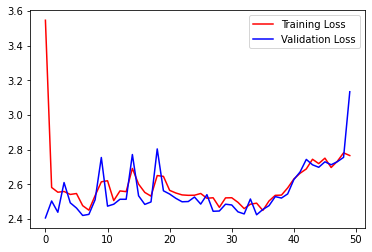

In [131]:
plt.plot(history.history['loss'],color='r',label='Training Loss')
plt.plot(history.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [132]:
model2 = Sequential()
model2.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model2.add(GRU(64,return_sequences=True))
model2.add(LSTM(64,return_sequences=True))
model2.add(TimeDistributed(Dense(vocab_fr+2)))

model2.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

model2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 20, 300)           60000     
_________________________________________________________________
gru_18 (GRU)                 (None, 20, 64)            70080     
_________________________________________________________________
lstm_14 (LSTM)               (None, 20, 64)            33024     
_________________________________________________________________
time_distributed_12 (TimeDis (None, 20, 320)           20800     
Total params: 183,904
Trainable params: 183,904
Non-trainable params: 0
_________________________________________________________________


In [134]:
history1=model2.fit(x=en_pad,y=fr_pad,epochs=50,validation_split=0.1,batch_size=128)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 9s 966us/step - loss: 3.2245 - accuracy: 0.4780 - val_loss: 3.0920 - val_accuracy: 0.4700
Epoch 2/50
9000/9000 [==============================] - 9s 953us/step - loss: 2.8542 - accuracy: 0.4888 - val_loss: 3.5708 - val_accuracy: 0.3541
Epoch 3/50
9000/9000 [==============================] - 9s 948us/step - loss: 2.9369 - accuracy: 0.4425 - val_loss: 2.6509 - val_accuracy: 0.4958
Epoch 4/50
9000/9000 [==============================] - 9s 949us/step - loss: 2.7162 - accuracy: 0.4825 - val_loss: 2.7409 - val_accuracy: 0.4757
Epoch 5/50
9000/9000 [==============================] - 9s 949us/step - loss: 2.5092 - accuracy: 0.5107 - val_loss: 2.4549 - val_accuracy: 0.5411
Epoch 6/50
9000/9000 [==============================] - 9s 951us/step - loss: 2.6331 - accuracy: 0.5030 - val_loss: 2.8562 - val_accuracy: 0.4340
Epoch 7/50
9000/9000 [==============================] - 9s 950us/step - loss

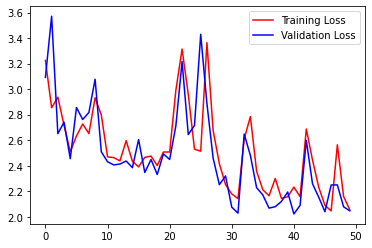

In [135]:
plt.plot(history1.history['loss'],color='r',label='Training Loss')
plt.plot(history1.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()

In [136]:
model3 = Sequential()
model3.add(Embedding(vocab_en+2,300,input_length=maxi_fr))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(LSTM(64,return_sequences=True))
model3.add(Dense(vocab_fr+2))

model3.compile(loss=sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

model3.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 20, 300)           60000     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 20, 128)           186880    
_________________________________________________________________
lstm_16 (LSTM)               (None, 20, 64)            49408     
_________________________________________________________________
dense_15 (Dense)             (None, 20, 320)           20800     
Total params: 317,088
Trainable params: 317,088
Non-trainable params: 0
_________________________________________________________________


In [137]:
history2=model3.fit(x=en_pad,y=fr_pad,epochs=50,validation_split=0.1,batch_size=128)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 15s 2ms/step - loss: 4.4379 - accuracy: 0.4168 - val_loss: 3.5051 - val_accuracy: 0.4168
Epoch 2/50
9000/9000 [==============================] - 14s 2ms/step - loss: 3.2665 - accuracy: 0.4111 - val_loss: 2.9052 - val_accuracy: 0.4031
Epoch 3/50
9000/9000 [==============================] - 14s 2ms/step - loss: 2.7467 - accuracy: 0.4233 - val_loss: 2.6072 - val_accuracy: 0.4532
Epoch 4/50
9000/9000 [==============================] - 14s 2ms/step - loss: 2.9368 - accuracy: 0.4546 - val_loss: 2.6807 - val_accuracy: 0.4672
Epoch 5/50
9000/9000 [==============================] - 14s 2ms/step - loss: 2.4809 - accuracy: 0.4632 - val_loss: 2.4236 - val_accuracy: 0.4341
Epoch 6/50
9000/9000 [==============================] - 14s 2ms/step - loss: 2.1665 - accuracy: 0.4953 - val_loss: 2.1906 - val_accuracy: 0.5165
Epoch 7/50
9000/9000 [==============================] - 14s 2ms/step - loss: 2.163

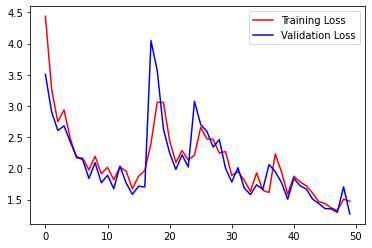

In [138]:
plt.plot(history2.history['loss'],color='r',label='Training Loss')
plt.plot(history2.history['val_loss'],color='b',label='Validation Loss')
plt.legend()
plt.show()